First we're going to import relevant libraries and load our data: 

In [1]:
import pandas as pd
raw = pd.read_csv('C:\\Users\Selfisher\Desktop\data.csv', '\t') 
# read more about this data in the readme file and codebook.txt
# Read more about the Big Five Model in https://en.wikipedia.org/wiki/Big_Five_personality_traits

In [2]:
raw.head() # Let's see how the data looks like

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


<AxesSubplot:>

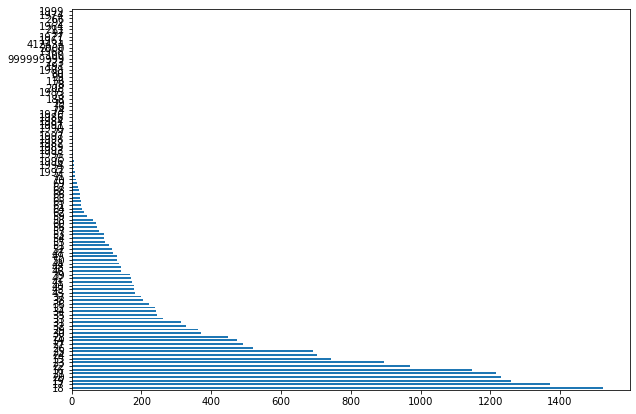

In [3]:
raw['age'].value_counts().plot(kind='barh',figsize=(10,7)) 
# Some people enterd their year of birth by accidant

In [4]:
raw.loc[raw['age']>1900, 'age'] = 2012 - raw.loc[raw['age']>1900, 'age']
# The test was conducted in 2012 so this should give us their age

<AxesSubplot:>

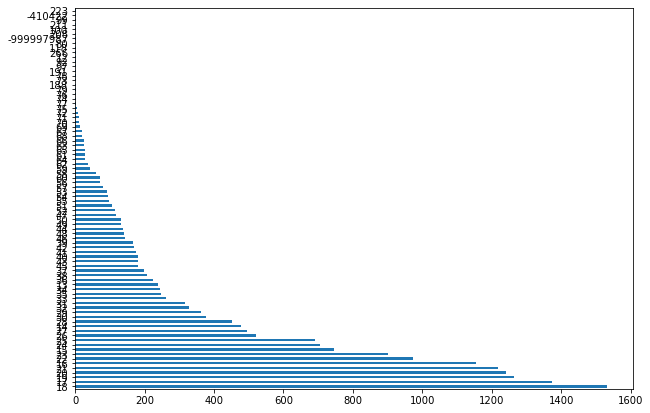

In [5]:
raw['age'].value_counts().plot(kind='barh',figsize=(10,7)) 
# Fixed some of it, but some still dont make sense

In [6]:
raw = raw[raw.age < 100]
raw = raw[raw.age >= 15]
# We are removing invalid age numbers because we believe the same people might not have responded truthfully
# to the questions later on

<AxesSubplot:>

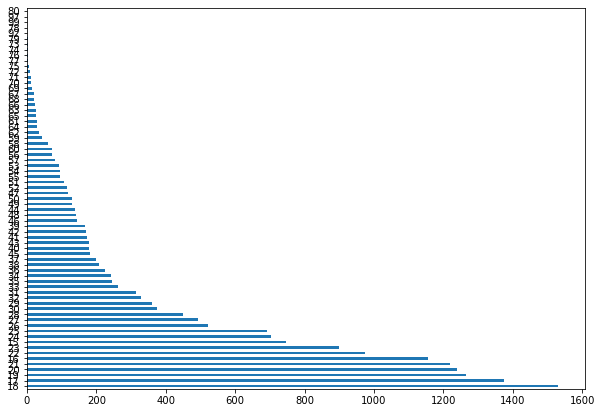

In [7]:
raw['age'].value_counts().plot(kind='barh',figsize=(10,7))
# now only truthful subjects are included

In [8]:
raw = raw.drop('age', axis=1).drop('engnat', axis=1).drop('race', axis=1).drop('hand', axis=1).drop('source', axis=1)
# Droping these columns, but the country column will be relevant

In [9]:
raw.head()

,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,US,4,2,5,2,5,1,4,3,...,4,1,3,1,5,1,4,2,5,5
1,2,US,2,2,3,3,3,3,1,5,...,3,3,3,3,2,3,3,1,3,2
3,2,RO,2,5,2,4,3,4,3,4,...,4,3,5,2,4,2,5,2,5,5
4,2,US,3,1,3,3,3,1,3,1,...,3,1,1,1,3,1,3,1,5,3
5,2,US,1,5,2,4,1,3,2,4,...,4,2,1,3,3,5,5,4,5,3


In [10]:
countries = pd.DataFrame(raw['country'].loc[raw['country']!='(nu'].value_counts()) # '(nu' is the symbol for null
countries.median() # There are alot of countries with very few subjects. Not enough to make conclusions

country    10.0
dtype: float64

In [11]:
countries = countries.loc[countries['country'] >= 200]
countries.median()

country    895.0
dtype: float64

In [12]:
len(countries) # So we're left with 9 countries

9

In [13]:
raw = raw.loc[raw['country'].isin(countries.index)] # Keep only those countries

In [14]:
len(raw['country'].value_counts()) # Seems like it worked!

9

Now the problem is that most skl algorithms dont know how to use strings for their predictions. So, we will split
the column 'country' into 9 columns of countries which will contain ones and zeros:
one if the subject is from the column's name (country)
or zero if not.
in each row there sould be exactly one "1".

In [15]:
n_data = raw.join(raw['country'].str.get_dummies(), how='right') 
# Combining the raw Data Frame to the new Data Frame

In [16]:
n_data.head()

,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,...,O10,AU,CA,GB,IN,IT,MY,PH,PK,US
0,1,US,4,2,5,2,5,1,4,3,...,5,0,0,0,0,0,0,0,0,1
1,2,US,2,2,3,3,3,3,1,5,...,2,0,0,0,0,0,0,0,0,1
4,2,US,3,1,3,3,3,1,3,1,...,3,0,0,0,0,0,0,0,0,1
5,2,US,1,5,2,4,1,3,2,4,...,3,0,0,0,0,0,0,0,0,1
6,2,US,5,1,5,1,5,1,5,4,...,4,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

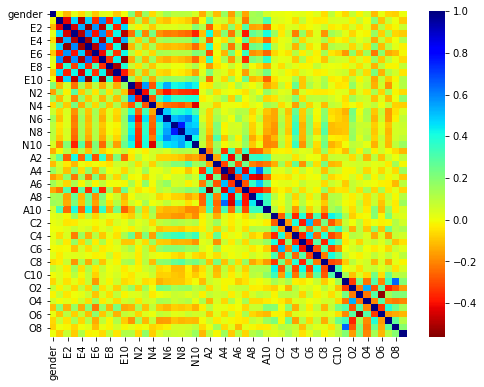

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(n_data.iloc[:, 0:51].corr(), cmap='jet_r')
# Each question at any given trait is correlated with other questions in the same trait.
# But the same questions are only mildly correlated or not corelated at all with questions from other traits.
# This is expected from this model and proves the datas validity

Now we will change the 'gender' column to a binary form

In [20]:
n_data['gender'].value_counts()

2    8960
1    5370
3      69
0      20
Name: gender, dtype: int64

In [21]:
n_data['gender'] = n_data['gender'] - 1 # now 1 is female and 0 is male

In [22]:
n_data = n_data.loc[n_data['gender']!=2] # 3 was "other", sorry 

In [23]:
n_data = n_data.loc[n_data['gender']!=-1] # 0 was "rather not say"

In [24]:
n_data['gender'].value_counts() # now it's binary

1    8960
0    5370
Name: gender, dtype: int64

In [25]:
from sklearn.utils import shuffle

Now we will make sure that data doesn't leak through the countries columns

In [26]:
for cnt in countries.index:
    print(cnt, ' : ')
    print(n_data.loc[n_data['country'] == cnt]['gender'].value_counts())
# Here we see that some countries hve different female to male ratios. 
# This might mean that we have a data leakage


US  : 
1    5505
0    2818
Name: gender, dtype: int64
IN  : 
0    838
1    609
Name: gender, dtype: int64
GB  : 
1    851
0    575
Name: gender, dtype: int64
AU  : 
1    571
0    343
Name: gender, dtype: int64
CA  : 
1    563
0    324
Name: gender, dtype: int64
PH  : 
1    444
0    159
Name: gender, dtype: int64
IT  : 
1    152
0    120
Name: gender, dtype: int64
MY  : 
1    153
0     89
Name: gender, dtype: int64
PK  : 
1    112
0    104
Name: gender, dtype: int64


In [27]:
# let's fix it
even = n_data[:0] # A new DF that has only the columns of n_data
for cnt in countries.index:  
    temp = n_data.loc[raw['country']==cnt] # A temporary DF of only one country (cnt)
    fem = temp.loc[temp['gender']==1] # Only the females in that country 
    mal = temp.loc[temp['gender']==0] # Only the males in that country
    if len(fem)<len(mal): # Making the female DF and the malse DF the same length
        mal = mal[:len(fem)]
    else:
        fem = fem[:len(mal)]
    even = even.append(fem.append(mal)) # Adding those, now even, male and female DF's to 'even'

In [28]:
n_data = shuffle(shuffle(even)) 
# The subjects are now clumped up in chunks of countries, and half male half female so a shuffle is needed
n_data['gender'].value_counts()

0    5141
1    5141
Name: gender, dtype: int64

In [29]:
for cnt in countries.index:
    print(cnt, ' : ')
    print(n_data.loc[n_data['country'] == cnt]['gender'].value_counts())
# Good! Now the algorithm can't cheat and use the female to male ratio in a given country to decide

US  : 
0    2818
1    2818
Name: gender, dtype: int64
IN  : 
0    609
1    609
Name: gender, dtype: int64
GB  : 
0    575
1    575
Name: gender, dtype: int64
AU  : 
0    343
1    343
Name: gender, dtype: int64
CA  : 
0    324
1    324
Name: gender, dtype: int64
PH  : 
0    159
1    159
Name: gender, dtype: int64
IT  : 
0    120
1    120
Name: gender, dtype: int64
MY  : 
0    89
1    89
Name: gender, dtype: int64
PK  : 
0    104
1    104
Name: gender, dtype: int64


In [30]:
n_data = n_data.drop('country', axis=1) # we ahve no use for the 'country' column antmore

In [31]:
to = 2000
train = n_data[:to]
test = n_data[to:]

In [32]:
trainx = train.drop('gender',axis=1)
trainy = train['gender']

In [53]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

In [34]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [54]:
dum = DummyClassifier()

In [67]:
cross_val_score(reg, trainx, trainy, cv=5,scoring='f1').mean()

0.6496264510687317

In [35]:
reg = linear_model.LogisticRegression() 

In [36]:
reg = linear_model.LinearRegression() 
# Not suitable for classifying

In [37]:
reg = DecisionTreeClassifier()

In [38]:
reg = KNeighborsClassifier(n_neighbors=40) 

In [39]:
reg = linear_model.RidgeClassifierCV()

In [70]:
scrs = []
f_scr = []

for i in range(50):
    train = shuffle(train) # Shuffling the trainin set to get the most out of it
    trainx = train.drop('gender',axis=1)
    trainy = train['gender']
    scrs.append(cross_val_score(reg, trainx, trainy, cv=5).mean())
    f_scr.append(cross_val_score(reg, trainx, trainy, cv=5,scoring='f1').mean())
    
print('Accuracy avg:', sum(scrs) / len(scrs)) 
print('F1 score:    ', sum(f_scr)/len(f_scr))
dmscr = cross_val_score(dum, trainx, trainy, cv=5).mean() # calculating the mean score of the DummyClassifier
print('Dummy score: ', dmscr)
dif = abs((sum(scrs) / len(scrs))- dmscr)
print('Difference:  ',dif)
df_ovr_dum = dif / (1-dmscr)
# this shows us the difference between the avg of the accuracy and the avg of the DummyClassifier score in those tests
# this tells us how much accuracy the model is responsible for

Accuracy avg: 0.6465099999999999
F1 score:     0.6565021249487945
Dummy score:  0.5045
Difference:   0.14200999999999997


In [71]:
plot_d = n_data
# making new DataFrame to work on for

In [72]:
chrs = {'O','C','E','A','N'}
qs = [] # A list of the questions asked
diff = [] # A list of the difference bitween the mean of male answers and menof female answers
for c in chrs:
    for i in range(10):
        s = c+str(i+1) # s looks like a question lable for example: 'C10
        qs.append(s) # adding the qeustion lable to the list
        diff.append((plot_d.loc[plot_d['gender']==0][s].mean()-plot_d.loc[plot_d['gender']==1][s].mean()))
        # adding the difference to the list in the same order as the questions

Positive: Men scored higher 
Negative: Women scored higher 


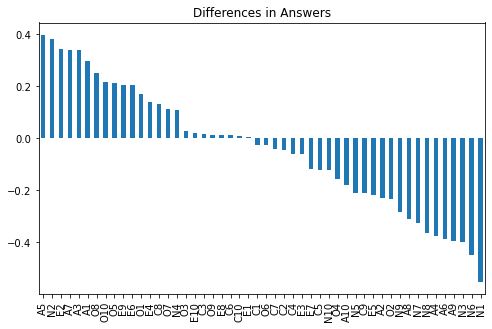

In [73]:
pd.DataFrame(diff,qs).sort_values(by=0,ascending=False).plot(kind='bar',
            figsize=(8,5),legend=False, title='Differences in Answers')

#Some questions are more important than others. Let's see that:
print('Positive: Men scored higher ')
print('Negative: Women scored higher ')
# This new data is especialy interesting when comparing it to the info in codebook.txt

In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np

Now we will find the best hyper parameters for our model and then, at last, test it

In [124]:
par = { 'fit_intercept':[True, False], 'normalize': [True, False], 'class_weight': ['balanced', None]}
gs = GridSearchCV(linear_model.RidgeClassifierCV(), par,cv=5,scoring='accuracy') 

In [125]:
gs.fit(trainx,trainy) 

GridSearchCV(cv=5,
             estimator=RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ])),
             param_grid={'class_weight': ['balanced', None],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='accuracy')

In [126]:
gs.best_params_ # The best hyper parameters

{'class_weight': None, 'fit_intercept': True, 'normalize': True}

In [127]:
reg = linear_model.RidgeClassifierCV(alphas=(0.1, 1, 10, 0.05, 0.5, 5), fit_intercept=True, normalize=True,cv=5)

In [128]:
dum.fit(trainx,trainy)

DummyClassifier()

In [129]:
reg.fit(trainx,trainy)

RidgeClassifierCV(alphas=array([ 0.1 ,  1.  , 10.  ,  0.05,  0.5 ,  5.  ]),
                  cv=5, normalize=True)

In [130]:
ans = reg.predict(test.drop('gender', axis=1))

In [131]:
con = confusion_matrix(test['gender'],ans)

In [122]:
print('Accuracy score in testing:', (con[1][1] + con[0][0]) / len(test))
dum_score = dum.score(test.drop('gender', axis=1), test['gender'])
print('Dummy score in testing:   ', dum_score)
spaces = '             '
print('Difference: ',spaces, (con[1][1] + con[0][0]) / len(test) - dum_score)

Accuracy score in testing: 0.6638493117604444
Dummy score in testing:    0.4989133059647428
Difference:                0.16493600579570156
